<a href="https://colab.research.google.com/github/siddharthc30/Image_Classification/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddharthcilamkoti","key":"91b8b943f176420589be12a3a27d7304"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 33.0MB/s]
 97% 263M/271M [00:02<00:00, 110MB/s]
100% 271M/271M [00:02<00:00, 106MB/s]
 98% 534M/543M [00:04<00:00, 113MB/s]
100% 543M/543M [00:05<00:00, 113MB/s]


In [0]:
from zipfile import ZipFile
with ZipFile('train.zip','r') as zip:
  zip.extractall()

with ZipFile('test1.zip','r') as zip:
  zip.extractall()  

In [7]:
! pip install keras

In [7]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Activation,Flatten
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
Train_Dir='./train'
Test_Dir='./test1'

IMG=os.listdir(Train_Dir)

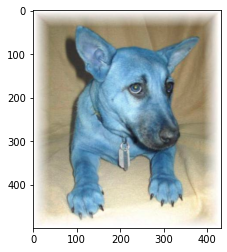

In [11]:
 for img in os.listdir(Train_Dir):
  img_array=cv2.imread(os.path.join(Train_Dir,img))
  plt.imshow(img_array)
  plt.show()
  break

In [12]:
print(img_array.shape)

(500, 431, 3)


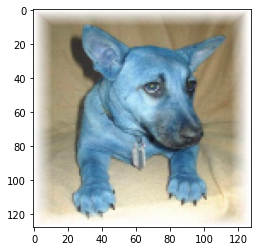

In [13]:
img_size=128
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)

In [0]:
training_data=[]

def create_trainingdata():
    for img in IMG:
      try:
        category=img.split('.')[0]
        if category == 'dog':
          label=1
        else:
          label=0  
        img_array =cv2.imread(os.path.join(Train_Dir,img))
        new_array =cv2.resize(img_array,(img_size,img_size))
        ##plt.imshow(new_array)
        ##plt.show()
        ##print(label)
        ##by running the above commented line we can check the labelling
        training_data.append([new_array,label])
      except Exception as e:
        pass

create_trainingdata()  

In [15]:
print(len(training_data))   

25000


In [0]:
import random 
random.shuffle(training_data)

In [0]:
X=[]
Y=[]

for features, label in training_data:
  X.append(features)
  Y.append(label)

X=np.array(X).reshape(-1,img_size,img_size,3)